<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/main/CodeExamples/Bayesian_coin_tosses_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import animation

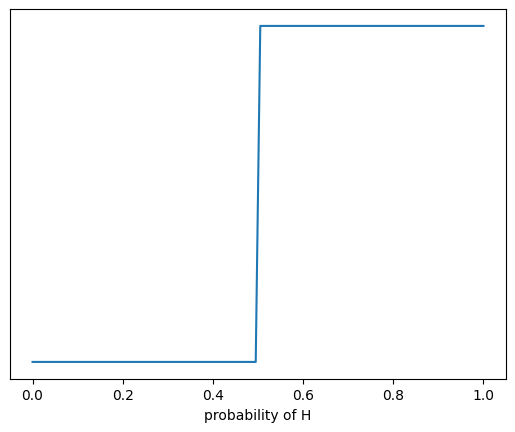

In [ ]:
x = np.linspace(0.0, 1, 100)
prior = np.ones_like(x)
prior[:50] = 0
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.yticks([]);

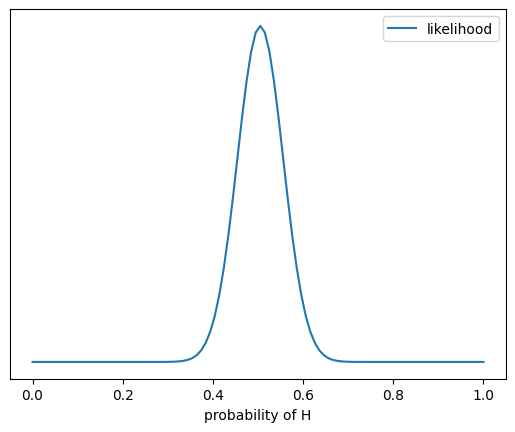

In [ ]:
x = np.linspace(0.0, 1, 100)
likelihood = stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood, label="likelihood")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

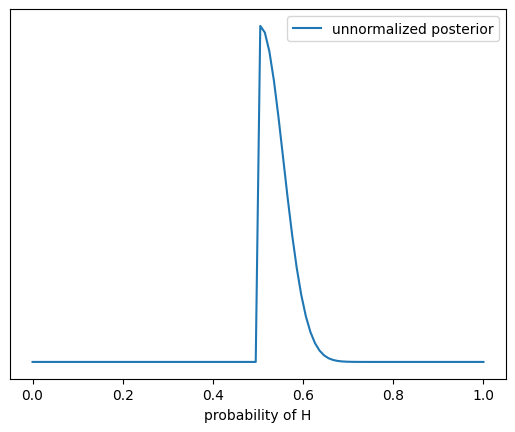

In [ ]:
x = np.linspace(0.0, 1, 100)
likelihood = stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

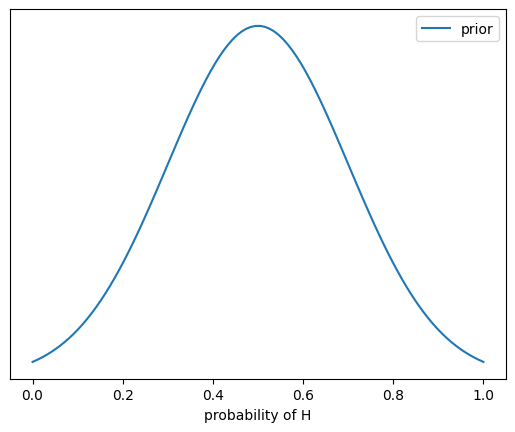

In [ ]:
x = np.linspace(0.0, 1, 100)
prior = stats.norm.pdf(x, 0.5, 0.2)
#prior[:50] = 0
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

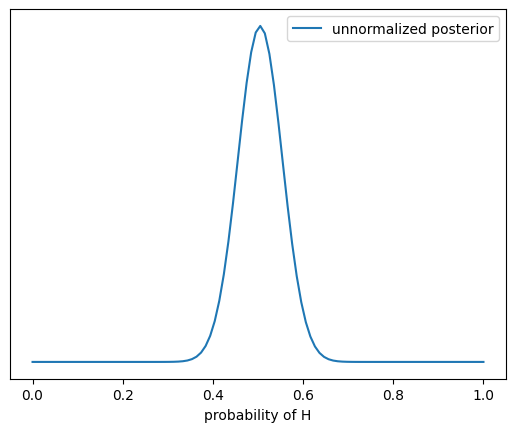

In [ ]:
x = np.linspace(0.0, 1, 100)
likelihood = stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

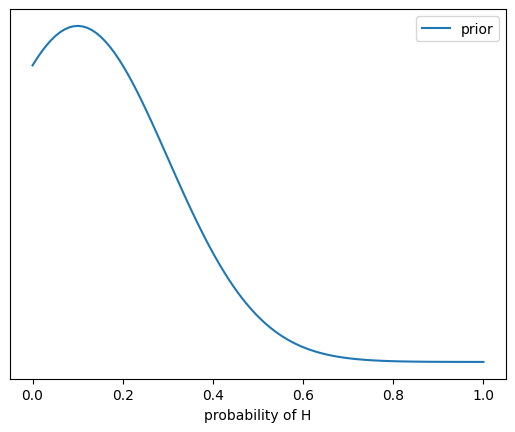

In [ ]:
x = np.linspace(0.0, 1, 100)
prior = stats.norm.pdf(x, 0.1, 0.2)
#prior[:50] = 0
plt.plot(x, prior, label="prior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

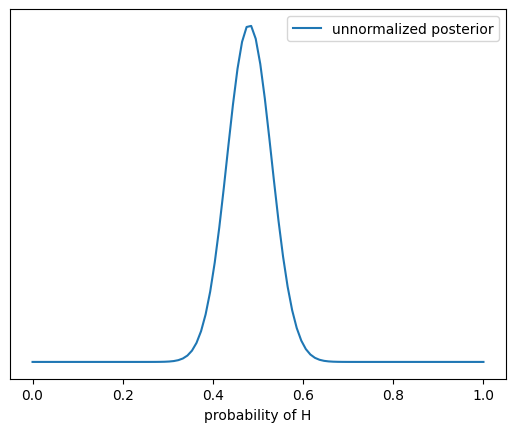

In [ ]:
x = np.linspace(0.0, 1, 100)
likelihood = stats.binom.pmf((x * 100).astype(int), 100, 0.5)
plt.plot(x, likelihood * prior, label="unnormalized posterior")
plt.xlabel("probability of H")
plt.legend();
plt.yticks([]);

In [ ]:
# Create the random variates
samples = stats.binom.rvs(1, 0.5, size=1000)

# initializing plot
def init_plot():
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 1), ylim=(0, 13))
    line, = ax.plot([], [], lw=2)
    #legend
    ttl = ax.text(0.6, 0.8,'',
                  transform = ax.transAxes, va='center', size=20)
    ax.set_xlabel("Posterior = Prior * Likelihood / Evidence")
    ax.set_ylabel("probability density")
    ax.set_xticks([0, 0.5, 1],
                  ["1", "0.5", "0" ])
    return fig, ax, ttl, line

#print(samples)


# init function
def init():
    ttl.set_text(f"prior:\nH= {h} T={t}")
    y = stats.beta.pdf(x, h, t)
    line.set_data(x, y)
    return line,

# animating the stuff
def animate(i):
    global h, t
    # somehow the init frame is not drawn, so a small hack here
    if i != 0:
        h += samples[i-1]
        t += 1 - samples[i-1]
    ttl.set_text(f"toss {i} \nH= {h}, T= {t}")
    y =  stats.beta.pdf(x, h, t)
    line.set_ydata(y)
    return line,

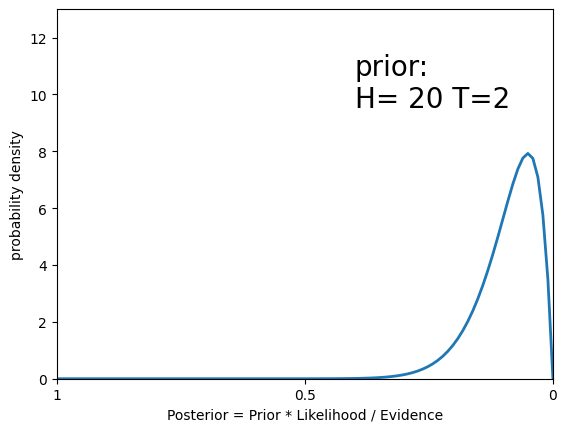

In [ ]:
h,t = 20,2
fig, ax, ttl, line = init_plot()
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=70, interval=200, blit=True)


In [ ]:
# let's animate
# you can increase/decrease the FPS at the beginning of this notebook

from IPython.display import HTML
HTML(anim.to_html5_video())